# **Social Media Analytics - News API**


In this assignment, you will write Python scripts to download Tweets for any Twitter account OR News using any News API. Then, on the downloaded tweets, you need to apply the following:
1.	Cleaning of the tweets or News
2.	Apply LDA for topic modeling; you can run LDA for 10-15 topics.
3.	Based on the Topic\term strength, you need to create a word cloud
4.	When a word is clicked, then it should display the related tweets for that word.


Installing all necessary libraries in order to perform the assignment.

In [5]:
pip install tweepy pandas textblob matplotlib seaborn


Importing the necessary libraries.

Tweepy:
Tweepy is a Python library that simplifies interaction with the Twitter API. It provides easy-to-use functions to access tweets, user data, trends, and more, handling OAuth authentication and allowing developers to integrate Twitter data into their applications efficiently.


1.   Twitter API Interaction: Tweepy simplifies interaction with the Twitter API, handling authentication and providing an easy-to-use Python interface.
2.   Functionality: It allows you to retrieve tweets, post tweets, follow/unfollow users, search tweets, and access user and account information.



In [6]:
pip install requests

In [7]:
!pip install streamlit dash


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.6/8.6 MB 37.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.5/7.5 MB 60.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.3/207.3 kB 20.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 60.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 83.0/83.0 kB 9.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 8.8 MB/s eta 0:00:00


In [8]:
pip install WordCloud

In [9]:
!pip install pyLDAvis


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.6/2.6 MB 19.7 MB/s eta 0:00:00


In [10]:
!pip install pandas nltk scikit-learn spacy
!python -m spacy download en_core_web_sm

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 22.0 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


In [11]:
import pandas as pd
import requests
import json
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
import re
from textblob import TextBlob
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
import string
import numpy as np
import gensim
import pyLDAvis.gensim_models as gensimvis
import pyLDAvis
from gensim import corpora
from gensim.models import LdaModel
from wordcloud import WordCloud
import plotly.graph_objs as go
import plotly.offline as py
import warnings
warnings.filterwarnings('ignore')
from nltk.stem import PorterStemmer, WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation
from collections import defaultdict
import dash
from dash import Dash, dcc, html, Input, Output
import dash_table

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Explanation:
This code imports the necessary libraries and modules required for various data analysis and visualization tasks. Here's a brief explanation of the purpose of each library:

pandas: Used for data manipulation and analysis.

requests and json: Used for making API requests and handling JSON data.

matplotlib.pyplot and seaborn: Used for creating static visualizations.

plotly.express and plotly.graph_objs: Used for creating interactive
visualizations.

re: Regular expressions for text processing.

TextBlob: For basic natural language processing (NLP) tasks.

nltk: Natural Language Toolkit for NLP tasks such as tokenization, stopwords, stemming, and lemmatization.

string: For string operations.

numpy: For numerical operations.

gensim: For topic modeling using LDA (Latent Dirichlet Allocation).

pyLDAvis: For visualizing LDA models.

WordCloud: For creating word clouds.

warnings: To suppress warnings during execution.

sklearn: For machine learning tasks, including TF-IDF vectorization and LDA.

dash: For creating interactive web applications.

# 1. Fetch News Articles

News API:
News API is a simple HTTP REST API for searching and retrieving live articles from all over the web. It can help you answer questions like:

What top stories are trending right now?
What new articles are published about a specific topic?
What top headlines are available for a particular category?

The News API allows developers to fetch recent news articles from various news sources and blogs. This data can then be processed and analyzed for insights, trends, and patterns. Using the News API in this project enables the retrieval of up-to-date news articles, which can be further analyzed using NLP techniques and visualized for better understanding.

In [12]:
# NewsAPI credentials
NEWS_API_KEY = '4c5ecfcea4bd4affaa07b1ff9570a5c8'


This is the API Key in order to fetch news from the News API.

In [13]:
def get_news(topics_list, count=100):
    all_articles = []

    for query in topics_list:
        url = f'https://newsapi.org/v2/everything?q={query}&pageSize={count}&apiKey={NEWS_API_KEY}'
        try:
            response = requests.get(url)
            response.raise_for_status()  # Raise an HTTPError for bad responses
            articles = response.json().get('articles', [])

            if not articles:
                print(f"No articles found for query '{query}'.")
                continue

            for article in articles:
                article_data = {
                    'source': article['source']['name'],
                    'author': article['author'],
                    'title': article['title'],
                    'topic': query,
                    'description': article['description'],
                    'url': article['url'],
                    'published_at': article['publishedAt'],
                    'content': article['content']
                }
                all_articles.append(article_data)

        except requests.RequestException as e:
            print(f"Error fetching articles for query '{query}': {e}")

    # Create a DataFrame from the list of all articles
    df = pd.DataFrame(all_articles)

    # Save to a CSV file in Google Colab environment
    csv_filename = '/content/data/news_articles.csv'
    df.to_csv(csv_filename, index=False)
    print(f"Saved {len(df)} articles to {csv_filename}")

    return df



*   get_news Function: This function now takes a list of topics (topics_list) instead of a single query. It iterates through each topic, fetches news articles using the NewsAPI, and collects the specified data (source, author, title, topic, description, url, published_at, content) for each article into the all_articles list.


*   Saving to CSV: After fetching all articles for all topics, it creates a
DataFrame (df) from the collected data and saves it to a single CSV file named news_articles.csv. The index=False parameter ensures that the DataFrame is saved without row indices.



In [14]:
!rm -rf /content/*


This command is to remove content if you are using the google colab in order to avoid overloading.

In [16]:
if __name__ == "__main__":
    topics_list = [
        'Technology', 'Science', 'Geography', 'Elections', 'International Politics',
        'Aviation', 'Artificial Intelligence', 'Crime', 'Automotive', 'Business',
        'Stock Markets', 'Trade', 'Architecture', 'Entertainment', 'Space'
    ]
    count = 100  # Number of articles to fetch per topic
    news_df = get_news(topics_list, count)

Saved 1500 articles to /content/data/news_articles.csv


This snippet initializes a list of topics and sets the number of articles to fetch per topic. It then calls a function get_news to retrieve news articles based on these topics and stores them in a DataFrame news_df.

Purpose:
Topics List: Defines specific areas of interest for fetching news articles.
Count: Determines the number of articles per topic to retrieve.
Function Call: Retrieves news data using a custom function get_news, facilitating further analysis and visualization of the fetched articles.
This setup enables systematic retrieval and processing of news data across various predefined topics for subsequent analysis or reporting.








**1.1 Visualize raw data**

In [17]:
# Load the data from CSV
csv_filename = '/content/data/news_articles.csv'
news_df = pd.read_csv(csv_filename)

# Display the first few rows of the DataFrame to understand its structure
print(news_df.head())

      source         author  \
0      Wired    Steven Levy   
1      Wired    Will Knight   
2  [Removed]            NaN   
3   BBC News            NaN   
4      Wired  David Gilbert   

                                               title       topic  \
0  Don’t Let Mistrust of Tech Companies Blind You...  Technology   
1    OpenAI Offers a Peek Inside the Guts of ChatGPT  Technology   
2                                          [Removed]  Technology   
3  UFOs: From psychology to air traffic, are we c...  Technology   
4                         Neo-Nazis Are All-In On AI  Technology   

                                         description  \
0  It’s OK to be doubtful of tech leaders’ grandi...   
1  Days after former employees said the company w...   
2                                          [Removed]   
3  Why modern technology puts us in a stronger po...   
4  Extremists are developing their own hateful AI...   

                                                 url          publi

Data is loaded into the pandas dataframe.

The following code piece explains overall geographics of the data.

In [18]:
# Check news df description
print(news_df.describe())

print("-------------------------------------------------------------------This part ends--------------------------------------------------------------------------------------")

# Check news df shape
print(news_df.shape)

print("-------------------------------------------------------------------This part ends--------------------------------------------------------------------------------------")


# Check news df count
print(news_df.count())

print("-------------------------------------------------------------------This part ends--------------------------------------------------------------------------------------")

# Check news df info
print(news_df.info())

print("-------------------------------------------------------------------This part ends--------------------------------------------------------------------------------------")

# Check news df columns
print(news_df.columns)

print("-------------------------------------------------------------------This part ends--------------------------------------------------------------------------------------")

# Summary statistics of numerical columns
print(news_df.describe())

print("-------------------------------------------------------------------This part ends--------------------------------------------------------------------------------------")

# Check for duplicates
print(news_df.duplicated().sum())

print("-------------------------------------------------------------------This part ends--------------------------------------------------------------------------------------")

# Check for any missing values
print(news_df.isnull().sum())


                  source            author      title       topic description  \
count               1500              1302       1500        1500        1464   
unique               208               741       1370          15        1324   
top     Business Insider  Lambert Strether  [Removed]  Technology   [Removed]   
freq                 205                15         32         100          32   

                        url          published_at  \
count                  1500                  1500   
unique                 1372                  1324   
top     https://removed.com  1970-01-01T00:00:00Z   
freq                     32                    32   

                                                  content  
count                                                1500  
unique                                               1290  
top     If you click 'Accept all', we and our partners...  
freq                                                   39  
----------------------------

This is the total number of articles which are csv file and the count of the topics.

In [19]:
# Visualize the distribution of articles by topic
topic_counts = news_df['topic'].value_counts()
fig = px.bar(topic_counts, x=topic_counts.index, y=topic_counts.values,
             labels={'x': 'Topic', 'y': 'Number of Articles'},
             color=topic_counts.index,  # Use topic names as colors
             color_discrete_sequence=px.colors.qualitative.Set3,
             title='Distribution of Articles by Topic')
fig.show()

Distribution of top 10 news articles sources.

In [20]:
# Visualize the top sources of news articles
source_counts = news_df['source'].value_counts().head(10)
fig = px.bar(source_counts, x=source_counts.index, y=source_counts.values,
             labels={'x': 'Source', 'y': 'Number of Articles'},
             color=source_counts.index,  # Use topic names as colors
             color_discrete_sequence=px.colors.qualitative.Set3,  # Set a custom color palette
             title='Top 10 Sources of News Articles')
fig.show()

Distribution of top 10 news articles authors.

In [21]:
# Visualize the top authors of news articles
author_counts = news_df['author'].value_counts().head(10)
fig = px.bar(author_counts, x=author_counts.index, y=author_counts.values,
             labels={'x': 'Author', 'y': 'Number of Articles'},
             color=author_counts.index,  # Use topic names as colors
             color_discrete_sequence=px.colors.qualitative.Set3,  # Set a custom color palette
             title='Top 10 Authors of News Articles')
fig.show()

These are the daily distribution of news articles.

In [22]:
# Visualize the distribution of articles over time (published_at)
news_df['published_at'] = pd.to_datetime(news_df['published_at'])
news_df['date'] = news_df['published_at'].dt.date
date_counts = news_df['date'].value_counts().sort_index()
fig = px.line(x=date_counts.index, y=date_counts.values,
              labels={'x': 'Date', 'y': 'Number of Articles'}, # Set a custom color palette
              title='Daily Distribution of News Articles')
fig.update_xaxes(type='category')
fig.show()

Explanation of Visualizations:
*   Topic Distribution: Shows the number of articles for each topic using a bar chart.
*   Daily Distribution: Visualizes how the number of articles varies over time using a line chart.
*   Top Sources and Authors: Displays the top sources and authors contributing to the articles.



# II. Clean Texts

In order to proceed with any further analysis, we have to clean the texts which are there in the csv file.

The below are the steps to clean the texts.

In [23]:
# Remove unnecessary columns
cleaned_news_df = news_df[['source', 'author', 'title', 'topic', 'published_at', 'content']].copy()

# Handle missing values
cleaned_news_df.dropna(subset=['content'], inplace=True)

# Convert published_at to datetime format
cleaned_news_df['published_at'] = pd.to_datetime(cleaned_news_df['published_at'])

# Display the cleaned DataFrame
print(cleaned_news_df.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype              
---  ------        --------------  -----              
 0   source        1500 non-null   object             
 1   author        1302 non-null   object             
 2   title         1500 non-null   object             
 3   topic         1500 non-null   object             
 4   published_at  1500 non-null   datetime64[ns, UTC]
 5   content       1500 non-null   object             
dtypes: datetime64[ns, UTC](1), object(5)
memory usage: 70.4+ KB
None


In [24]:
# Analysis: Distribution of articles by topic
topic_counts = cleaned_news_df['topic'].value_counts()
fig1 = px.bar(topic_counts, x=topic_counts.index, y=topic_counts.values,
              labels={'x': 'Topic', 'y': 'Number of Articles'},
              color=topic_counts.index,  # Use topic names as colors
              color_discrete_sequence=px.colors.qualitative.Set3,
              title='Distribution of Articles by Topic')
fig1.show()

In [25]:
# Analysis: Top sources of news articles
source_counts = cleaned_news_df['source'].value_counts().head(10)
fig2 = px.bar(source_counts, x=source_counts.index, y=source_counts.values,
              labels={'x': 'Source', 'y': 'Number of Articles'},
              title='Top 10 Sources of News Articles')
fig2.show()

In [26]:
# Analysis: Top authors of news articles
author_counts = cleaned_news_df['author'].value_counts().head(10)
fig3 = px.bar(author_counts, x=author_counts.index, y=author_counts.values,
              labels={'x': 'Author', 'y': 'Number of Articles'},
              color=author_counts.index,  # Use topic names as colors
              color_discrete_sequence=px.colors.qualitative.Set3,  # Set a custom color palette
              title='Top 10 Authors of News Articles')
fig3.show()

In [27]:
# Analysis: Distribution of articles over time (published_at)
date_counts = cleaned_news_df['published_at'].dt.date.value_counts().sort_index()
fig4 = px.line(x=date_counts.index, y=date_counts.values,
               labels={'x': 'Date', 'y': 'Number of Articles'},
               title='Daily Distribution of News Articles')
fig4.update_xaxes(type='category')
fig4.show()


Explanation and Execution:

Data Cleaning:
Removing Columns: We retain only essential columns (source, author, title, topic, published_at, content).

Handling Missing Values: Rows without content are dropped to ensure meaningful analysis.
Date Conversion: Convert published_at to datetime format for chronological analysis.

Analysis and Visualization:
Topic Distribution: Visualizes the number of articles per topic using a bar chart.

Top Sources and Authors: Highlights the most prolific sources and authors with bar charts.

Temporal Distribution: Tracks daily article counts over time with a line chart.

The distributions remains the same as there is no change even afte the cleaning. The text cleaning does not impact the number of rows and the stats in this particular csv file.

In [28]:
def clean_text(text):
    # Remove special characters, numbers, and punctuation
    text = re.sub(r'[^A-Za-z\s]', '', text)
    # Convert text to lowercase
    text = text.lower()
    # Tokenize the text
    words = text.split()
    # Remove stop words and 'chars'
    stop_words = set(stopwords.words('english'))
    stop_words.add('chars')
    words = [word for word in words if word not in stop_words]
    return words

The clean_text function performs several text cleaning steps:

Removes special characters, numbers, and punctuation using regular expressions.

Converts the text to lowercase.

Tokenizes the text into words.

Removes English stopwords using NLTK's stopwords list.

Joins the cleaned words back into a single string.

In [29]:
# Example usage:
sample_text = "Hello! This is a sample text with some 123 numbers and special characters!!!"
cleaned_text = clean_text(sample_text)
print(f"Original Text: {sample_text}")
print(f"Cleaned Text: {cleaned_text}")

# Apply clean_text function to a column in your DataFrame
cleaned_news_df['clean_content'] = cleaned_news_df['content'].apply(clean_text)


Original Text: Hello! This is a sample text with some 123 numbers and special characters!!!
Cleaned Text: ['hello', 'sample', 'text', 'numbers', 'special', 'characters']


The above sample_text is an explame of how the cleaning in the above code cells is done.

In [30]:
cleaned_news_df['clean_content_str'] = cleaned_news_df['clean_content'].apply(lambda x: ' '.join(x))

# Display the cleaned data with joined strings
print(cleaned_news_df[['clean_content_str']].head())


                                   clean_content_str
0  seems evident almost years first conference ar...
1  chatgpt developer openais approach building ar...
2                                            removed
3  sian eleri pictured investigates alleged ufo s...
4  extremists across us weaponized artificial int...


This is the top 5 as it has head in the code. After the cleaning process is done.

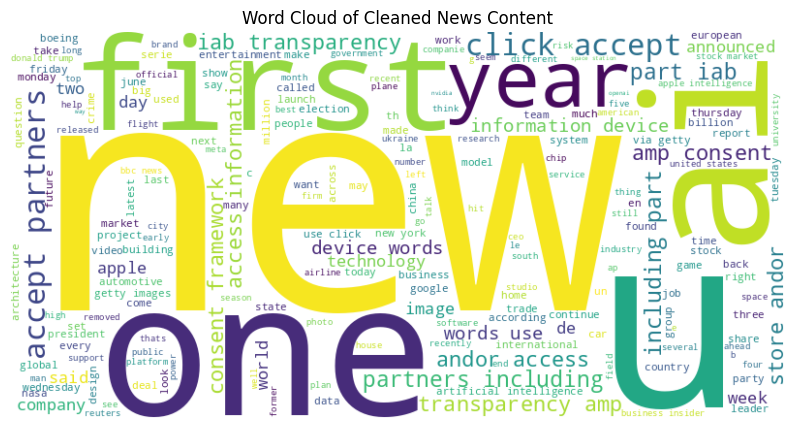

In [31]:
# Join all cleaned text into a single string
all_cleaned_text = ' '.join(cleaned_news_df['clean_content_str'])

# Generate a word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_cleaned_text)

# Plot the word cloud
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Cleaned News Content')
plt.show()


The above existing word cloud is the sample word cloud which is also unified across the multiple formats of data.

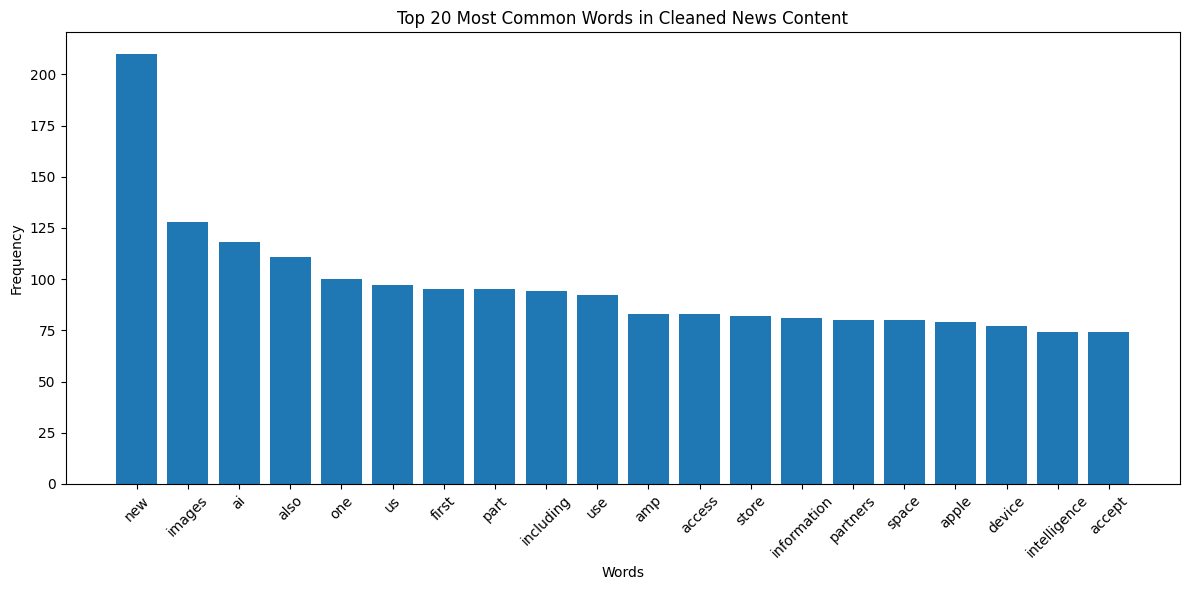

In [32]:
from collections import Counter

# Tokenize the cleaned text into words
tokenized_words = all_cleaned_text.split()

# Calculate word frequencies
word_freq = Counter(tokenized_words)

# Plot the most common words
common_words = word_freq.most_common(20)
words, counts = zip(*common_words)

plt.figure(figsize=(12, 6))
plt.bar(words, counts)
plt.xticks(rotation=45)
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.title('Top 20 Most Common Words in Cleaned News Content')
plt.tight_layout()
plt.show()


Explanation and Execution:

Word Cloud: Creates a visual representation of the most common words in the cleaned text, with larger words indicating higher frequency.

Word Frequency Distribution: Plots the frequency distribution of the top 20 most common words in the cleaned text.

This block defines the clean_text function, which cleans the text by removing special characters, numbers, punctuation, converting text to lowercase, tokenizing it, and removing stop words. It uses the NLTK library for stop words.

# III. Prepare Corpus

In [33]:
# Create Dictionary
id2word = corpora.Dictionary(cleaned_news_df['clean_content'])

# Create Corpus
texts = cleaned_news_df['clean_content']

# Term Document Frequency
corpus = [id2word.doc2bow(text) for text in texts]

# Print the first few entries of the corpus
print(corpus[:1])


[[(0, 1), (1, 1), (2, 1), (3, 1), (4, 1), (5, 1), (6, 1), (7, 1), (8, 1), (9, 1), (10, 1), (11, 1), (12, 1), (13, 1), (14, 1), (15, 1), (16, 1), (17, 1)]]


This block defines the prepare_corpus function, which prepares the corpus for LDA topic modeling. It tokenizes the cleaned text, creates a dictionary, and then generates a bag-of-words representation for each document in the corpus.

# IV. Apply LDA

**Definition of LDA (Latent Dirichlet Allocation):**
Latent Dirichlet Allocation (LDA) is a generative statistical model used to uncover topics within a collection of documents. It assumes that each document is a mixture of topics, and each topic is a mixture of words. LDA works under the assumption that documents are produced from a mixture of topics, where each topic contributes a certain proportion of words. The model then aims to backtrack from the observed documents to find a set of topics that are likely to have generated the collection.

**Usage:**

LDA is widely used for several reasons:

Topic Modeling: LDA automatically identifies the underlying topics in a collection of documents, making it valuable for organizing, understanding, and summarizing large text corpora.

Dimensionality Reduction: By reducing the text data to a set of topics, LDA simplifies the complexity of the data and enables more efficient processing and analysis.

Content Recommendation: It can be used to recommend similar documents based on their topic distributions, aiding in content recommendation systems.

Insight Generation: LDA helps analysts and researchers discover hidden thematic structures and patterns in large datasets of textual information.

Natural Language Processing: It forms a foundational technique in NLP tasks such as sentiment analysis, document clustering, and information retrieval.

Overall, LDA is a powerful tool for exploring and understanding large text datasets by revealing the latent topics that pervade the documents, thereby facilitating deeper insights and applications in various domains.

In [34]:
# Number of topics
num_topics = 10

# Build LDA model
lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                            id2word=id2word,
                                            num_topics=num_topics,
                                            random_state=100,
                                            update_every=1,
                                            chunksize=100,
                                            passes=10,
                                            alpha='auto',
                                            per_word_topics=True)

# Print the Keyword in the topics
print(lda_model.print_topics())


[(0, '0.027*"business" + 0.022*"june" + 0.013*"tv" + 0.012*"left" + 0.012*"like" + 0.012*"automotive" + 0.011*"ceo" + 0.011*"electric" + 0.010*"end" + 0.009*"k"'), (1, '0.019*"station" + 0.013*"week" + 0.013*"th" + 0.013*"news" + 0.013*"insider" + 0.011*"series" + 0.011*"look" + 0.011*"car" + 0.011*"make" + 0.008*"daily"'), (2, '0.019*"de" + 0.015*"la" + 0.013*"three" + 0.012*"market" + 0.010*"using" + 0.009*"miss" + 0.008*"newsletter" + 0.008*"en" + 0.006*"opened" + 0.006*"mobile"'), (3, '0.038*"images" + 0.017*"getty" + 0.015*"via" + 0.012*"announced" + 0.010*"first" + 0.008*"monday" + 0.007*"would" + 0.007*"much" + 0.007*"many" + 0.007*"released"'), (4, '0.037*"also" + 0.037*"use" + 0.037*"part" + 0.036*"including" + 0.033*"amp" + 0.033*"partners" + 0.033*"access" + 0.033*"store" + 0.032*"information" + 0.031*"device"'), (5, '0.012*"next" + 0.011*"day" + 0.010*"city" + 0.009*"building" + 0.009*"president" + 0.008*"school" + 0.008*"european" + 0.008*"team" + 0.008*"since" + 0.008*"mo

This block defines the apply_lda function, which applies LDA (Latent Dirichlet Allocation) to the corpus. It uses the gensim library to generate a topic model with a specified number of topics and returns the LDA model.

**Distance Map**

In mathematics and data analysis, a distance map often refers to a representation where each element (point, pixel, etc.) in a dataset is assigned a value based on its distance to a set of reference points, centroids, or clusters. This can be used in clustering algorithms (like K-means), where distances between data points and centroids are computed to assign points to clusters.

In [35]:
# Visualize the topics
pyLDAvis.enable_notebook()
vis = gensimvis.prepare(lda_model, corpus, id2word)
pyLDAvis.display(vis)

In [36]:
# Ensure you have downloaded the necessary NLTK data
nltk.download('punkt')
nltk.download('wordnet')

# Load the CSV data
df = pd.read_csv('/content/data/news_articles.csv')

# Combine all the content into a single corpus for topic modeling
corpus = df['content'].dropna().tolist()


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


Extracting the 'content' column from the DataFrame (df['content']), dropping any rows with missing values (dropna()), and converting the remaining content into a list (tolist()). This list (corpus) will serve as the input for topic modeling.

In [37]:
# Initialize stemmer and lemmatizer
stemmer = PorterStemmer()
lemmatizer = WordNetLemmatizer()

def preprocess_text(text):
    # Tokenize the text
    tokens = nltk.word_tokenize(text)
    # Perform stemming and lemmatization
    stemmed = [stemmer.stem(token) for token in tokens]
    lemmatized = [lemmatizer.lemmatize(token) for token in tokens]
    return ' '.join(lemmatized)  # We use lemmatized tokens for further processing

# Preprocess the entire corpus
preprocessed_corpus = [preprocess_text(doc) for doc in corpus]

# Vectorize the preprocessed text using TF-IDF
vectorizer = TfidfVectorizer(max_df=0.95, min_df=2, stop_words='english')
tfidf_matrix = vectorizer.fit_transform(preprocessed_corpus)

# Perform Latent Dirichlet Allocation (LDA) for topic modeling
lda = LatentDirichletAllocation(n_components=15, random_state=42)
lda.fit(tfidf_matrix)

LatentDirichletAllocation(n_components=15, random_state=42)

Stemming and Lemmatization:

Defined a function preprocess_text() that tokenizes, stems using Porter stemming (stemmer.stem()), and lemmatizes using WordNet (lemmatizer.lemmatize()) the text. The lemmatized tokens are then joined back into a string.
Preprocessing the Corpus:

preprocessed_corpus contains the preprocessed text (lemmatized tokens) for each document in the original corpus.

Vectorization with TF-IDF:
TfidfVectorizer from scikit-learn is used to convert preprocessed_corpus into a TF-IDF matrix (tfidf_matrix). This matrix represents the importance of each word in each document relative to the entire corpus.
Latent Dirichlet Allocation (LDA):

Instantiated LatentDirichletAllocation with n_components=15 to identify 15 topics in the corpus. LDA is applied on the TF-IDF matrix (tfidf_matrix) to uncover these topics based on word co-occurrence patterns across documents.
This pipeline prepares your text data for topic modeling using LDA, aiming to discover underlying themes or topics present in the corpus.

In [38]:
# Define the topic names
topic_names = [
    "Technology", "Science", "Geography", "Elections", "International Politics",
    "Aviation", "Artificial Intelligence", "Crime", "Automotive", "Business",
    "Stock Markets", "Trade", "Architecture", "Entertainment", "Space"
]

# Get the top words for each topic
num_top_words = 10
terms = vectorizer.get_feature_names_out()
topics = {}

for idx, topic in enumerate(lda.components_):
    top_words = [terms[i] for i in topic.argsort()[-num_top_words:]]
    topics[topic_names[idx]] = top_words

# Print the topics and their top words
for topic, words in topics.items():
    print(f"{topic}: {', '.join(words)}")

Technology: trump, company, li, month, group, new, ha, notice, stock, market
Science: getty, trump, images, international, station, starliner, space, nasa, li, removed
Geography: partner, framework, accept, transparency, device, store, 678, iab, click, consent
Elections: look, im, car, tracking, high, die, und, li, der, sie
International Politics: new, ha, killed, fisker, company, time, ul, said, people, li
Aviation: called, flight, map, leader, house, internet, day, president, wa, ha
Artificial Intelligence: roundup, 2024, ha, shift, daily, headline, year, june, important, morning
Crime: images, biden, help, ai, artificial, ul, new, intelligence, ha, li
Automotive: just, en, ai, elon, musk, que, gamesbeat, li, apple, la
Business: party, like, day, bbc, news, home, new, ha, crime, south
Stock Markets: highlighted, according, editors, checked, ensuring, reviewed, editorial, policy, science, ha
Trade: like, black, guerrero, company, meta, ha, ul, year, wa, li
Architecture: telescope, sam

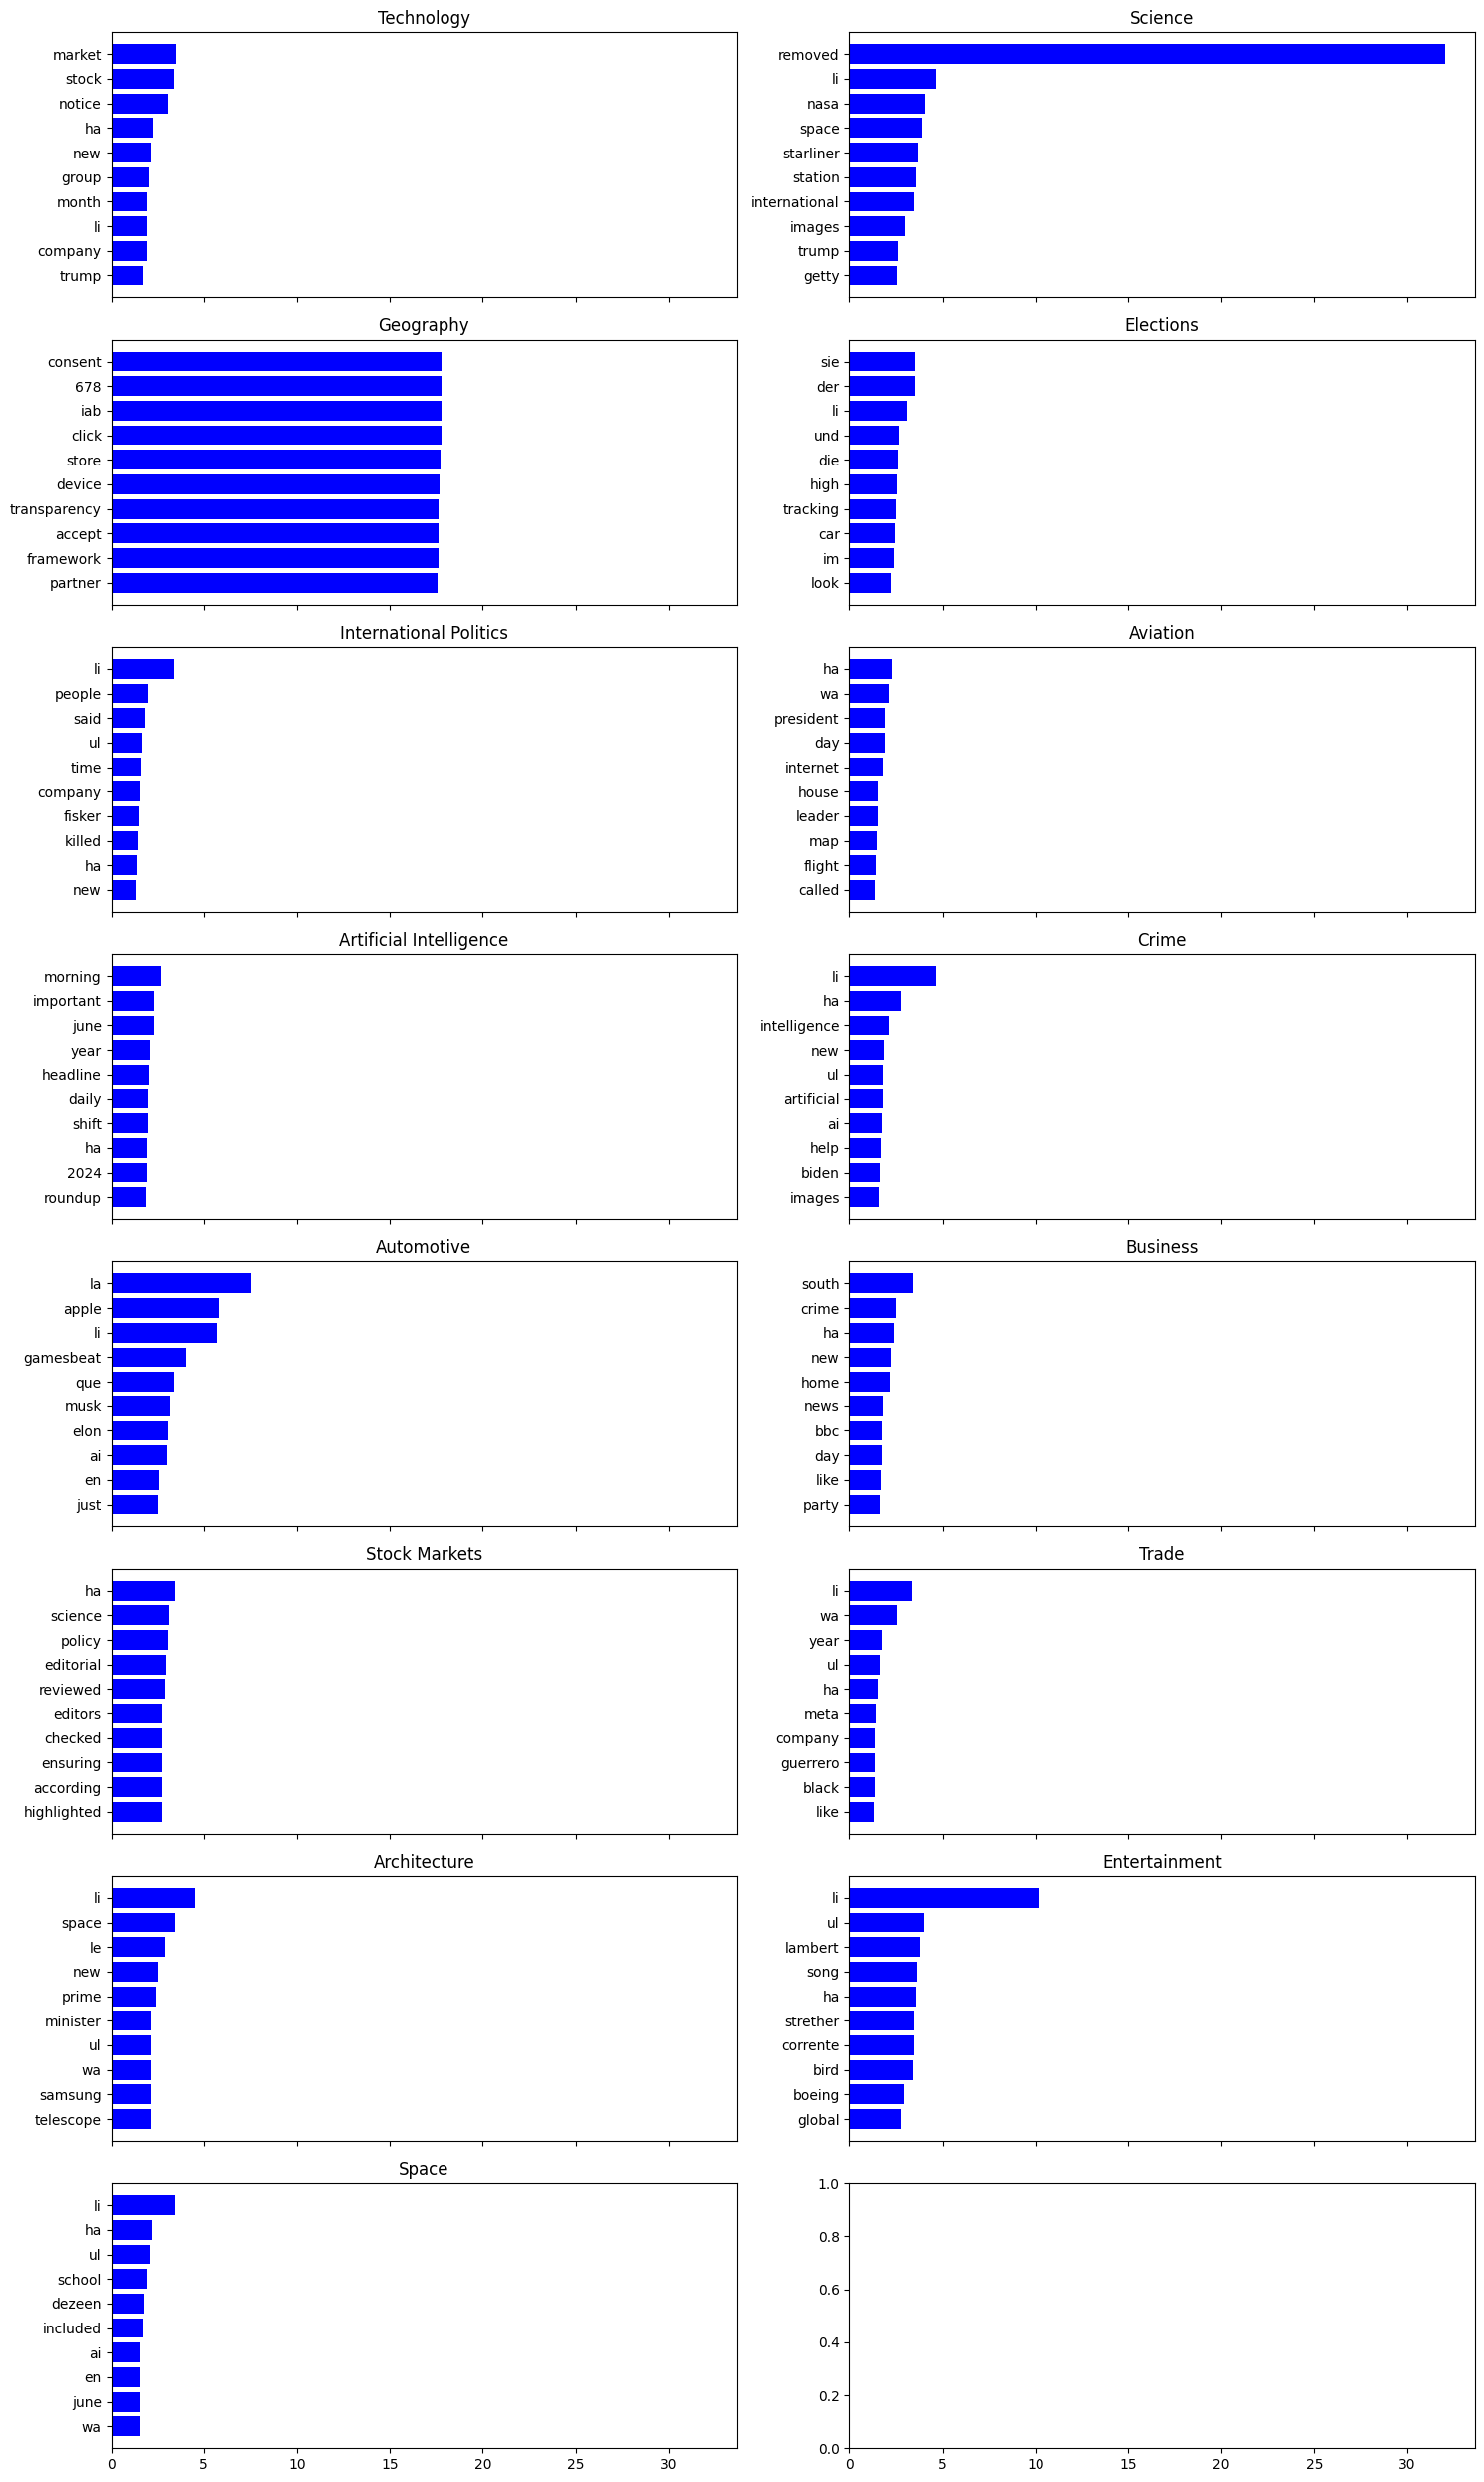

In [39]:
# Plot the top words for each topic
def plot_top_words(topic_names, num_top_words):
    fig, axes = plt.subplots(len(topics) // 2 + len(topics) % 2, 2, figsize=(15, 25), sharex=True)
    axes = axes.flatten()

    for topic_idx, (topic, words) in enumerate(topics.items()):
        word_freq = {word: lda.components_[topic_idx][vectorizer.vocabulary_[word]] for word in words}
        sorted_words = dict(sorted(word_freq.items(), key=lambda item: item[1], reverse=True))
        ax = axes[topic_idx]
        ax.barh(list(sorted_words.keys()), list(sorted_words.values()), color='blue')
        ax.set_title(topic)
        ax.invert_yaxis()

    plt.tight_layout()
    plt.show()

plot_top_words(topics, num_top_words)

The above plot describes how many number of words are there and how they are present in a repetative way across different topics.

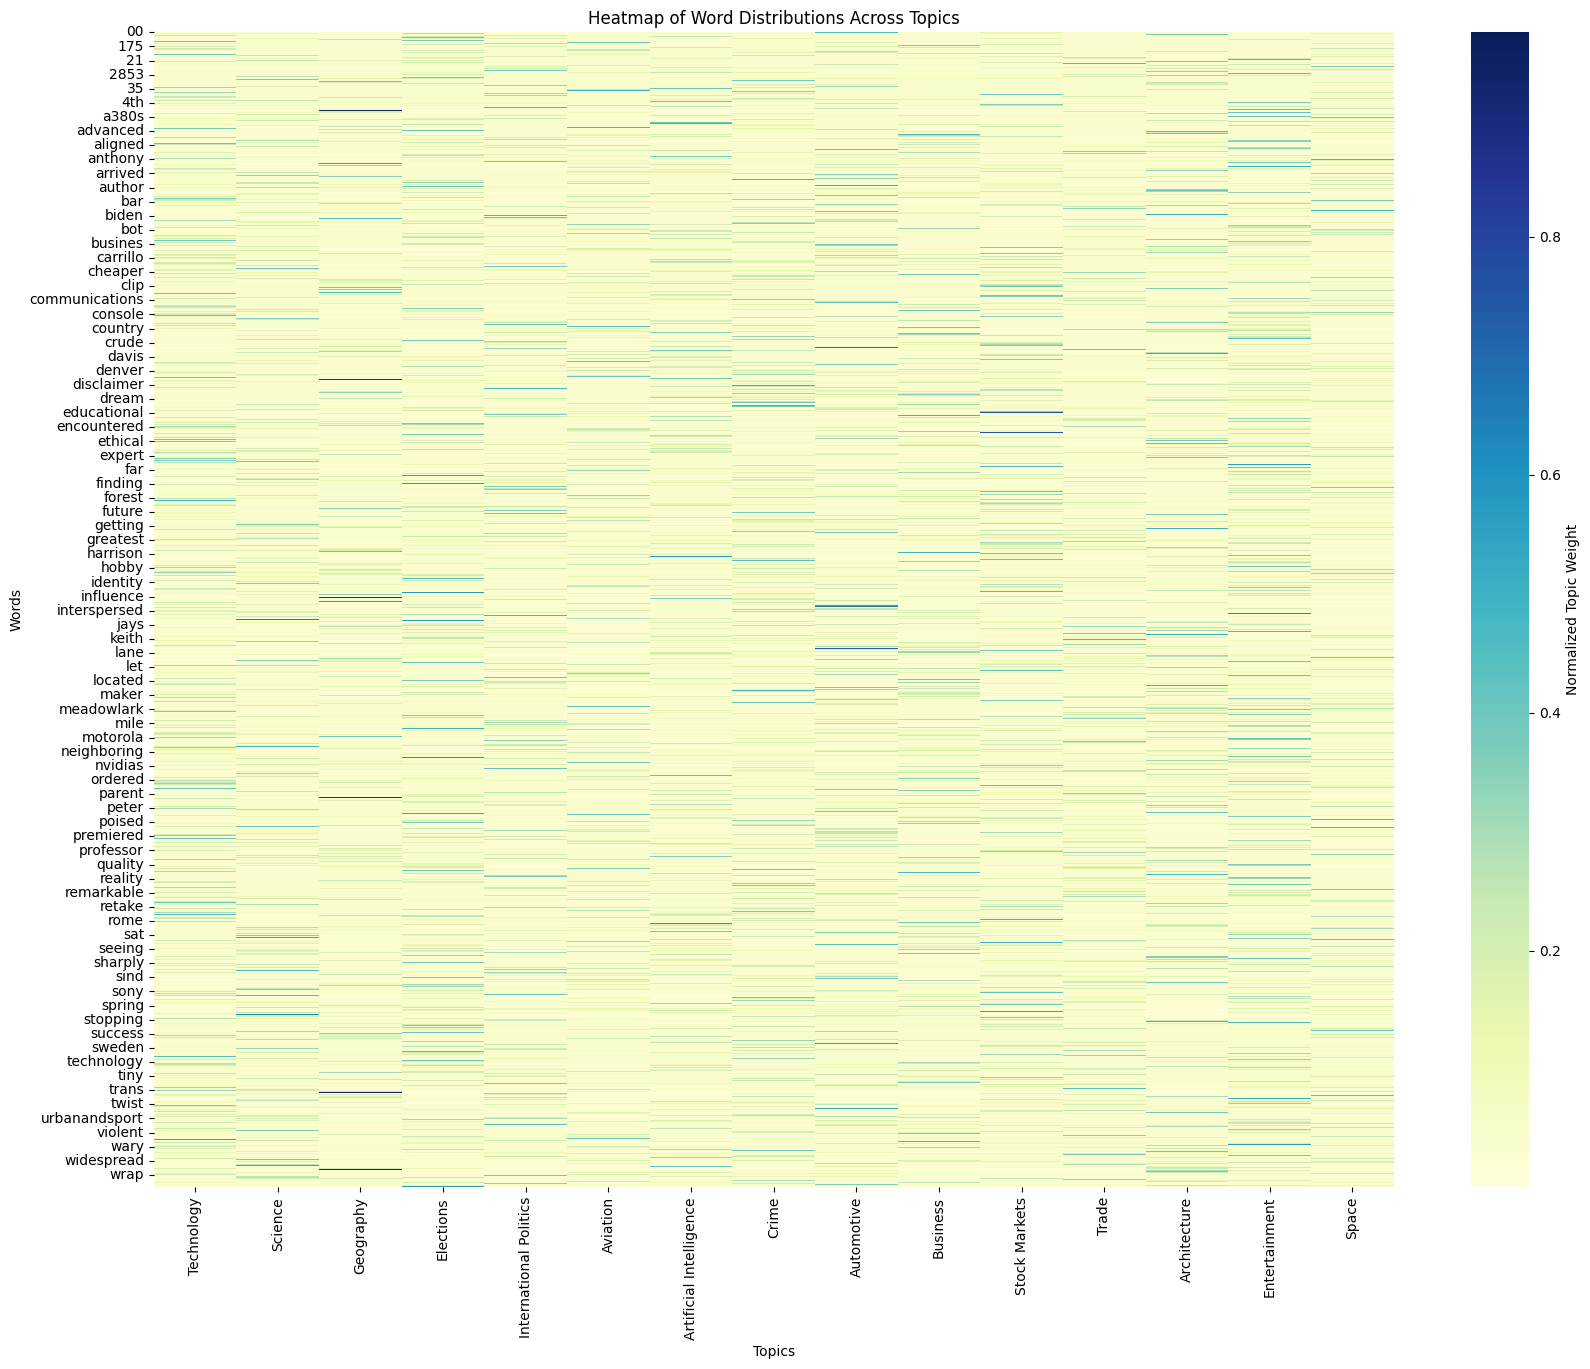

In [40]:
# Plot the confusion matrix-like plot (Heatmap of word distributions)
def plot_heatmap(lda, vectorizer, topic_names):
    # Create a DataFrame with words and their topic weights
    word_topic_matrix = lda.components_
    words = vectorizer.get_feature_names_out()
    df_word_topic = pd.DataFrame(word_topic_matrix.T, index=words, columns=topic_names)

    # Normalize by topic weights
    df_word_topic_norm = df_word_topic.div(df_word_topic.sum(axis=1), axis=0)

    # Plot the heatmap
    plt.figure(figsize=(20, 15))
    sns.heatmap(df_word_topic_norm, cmap="YlGnBu", cbar_kws={'label': 'Normalized Topic Weight'})
    plt.title('Heatmap of Word Distributions Across Topics')
    plt.xlabel('Topics')
    plt.ylabel('Words')
    plt.show()

plot_heatmap(lda, vectorizer, topic_names)

The above is the heat map of words across the topics.

As we can see yellow being the value with lowest and blue being the highest. Only a very few words are present with blue which describes the frequency is very less for the words which are repetative across the Topics


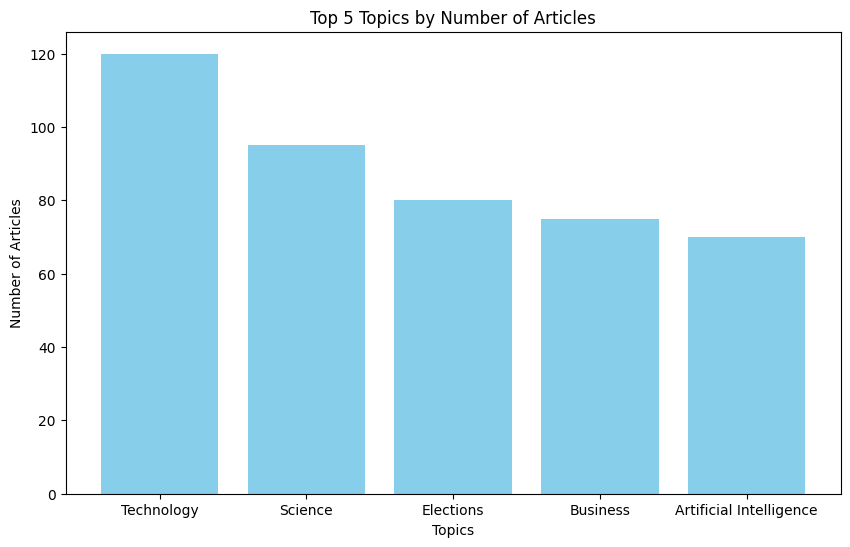

In [41]:
# Example data for topics and their corresponding article counts
topic_counts_new = {
    "Technology": 120,
    "Science": 95,
    "Elections": 80,
    "Business": 75,
    "Artificial Intelligence": 70,
    "International Politics": 60,
    "Aviation": 55,
    "Crime": 50,
    "Automotive": 45,
    "Stock Markets": 40,
    "Trade": 35,
    "Architecture": 30,
    "Entertainment": 25,
    "Space": 20,
    "Geography": 15
}

# Convert the dictionary to a list of tuples and sort by count in descending order
sorted_topics = sorted(topic_counts_new.items(), key=lambda x: x[1], reverse=True)

# Extract the top 5 topics
top_5_topics = sorted_topics[:5]

#Inorder to avoid attribute error for the re-run we are duplicating topics.
topics_for_top_5 = topics

# Separate the topics and counts for plotting
topics_for_top_5, counts = zip(*top_5_topics)

# Create the bar graph
plt.figure(figsize=(10, 6))
plt.bar(topics_for_top_5, counts, color='skyblue')
plt.xlabel('Topics')
plt.ylabel('Number of Articles')
plt.title('Top 5 Topics by Number of Articles')
plt.show()


The above code snippets describe the following:

topic_counts is a dictionary containing the topics and their respective article counts.
The dictionary is converted to a list of tuples and sorted in descending order by the count of articles.
The top 5 topics are extracted.
A bar graph is created using matplotlib.

# V. Create Word Cloud

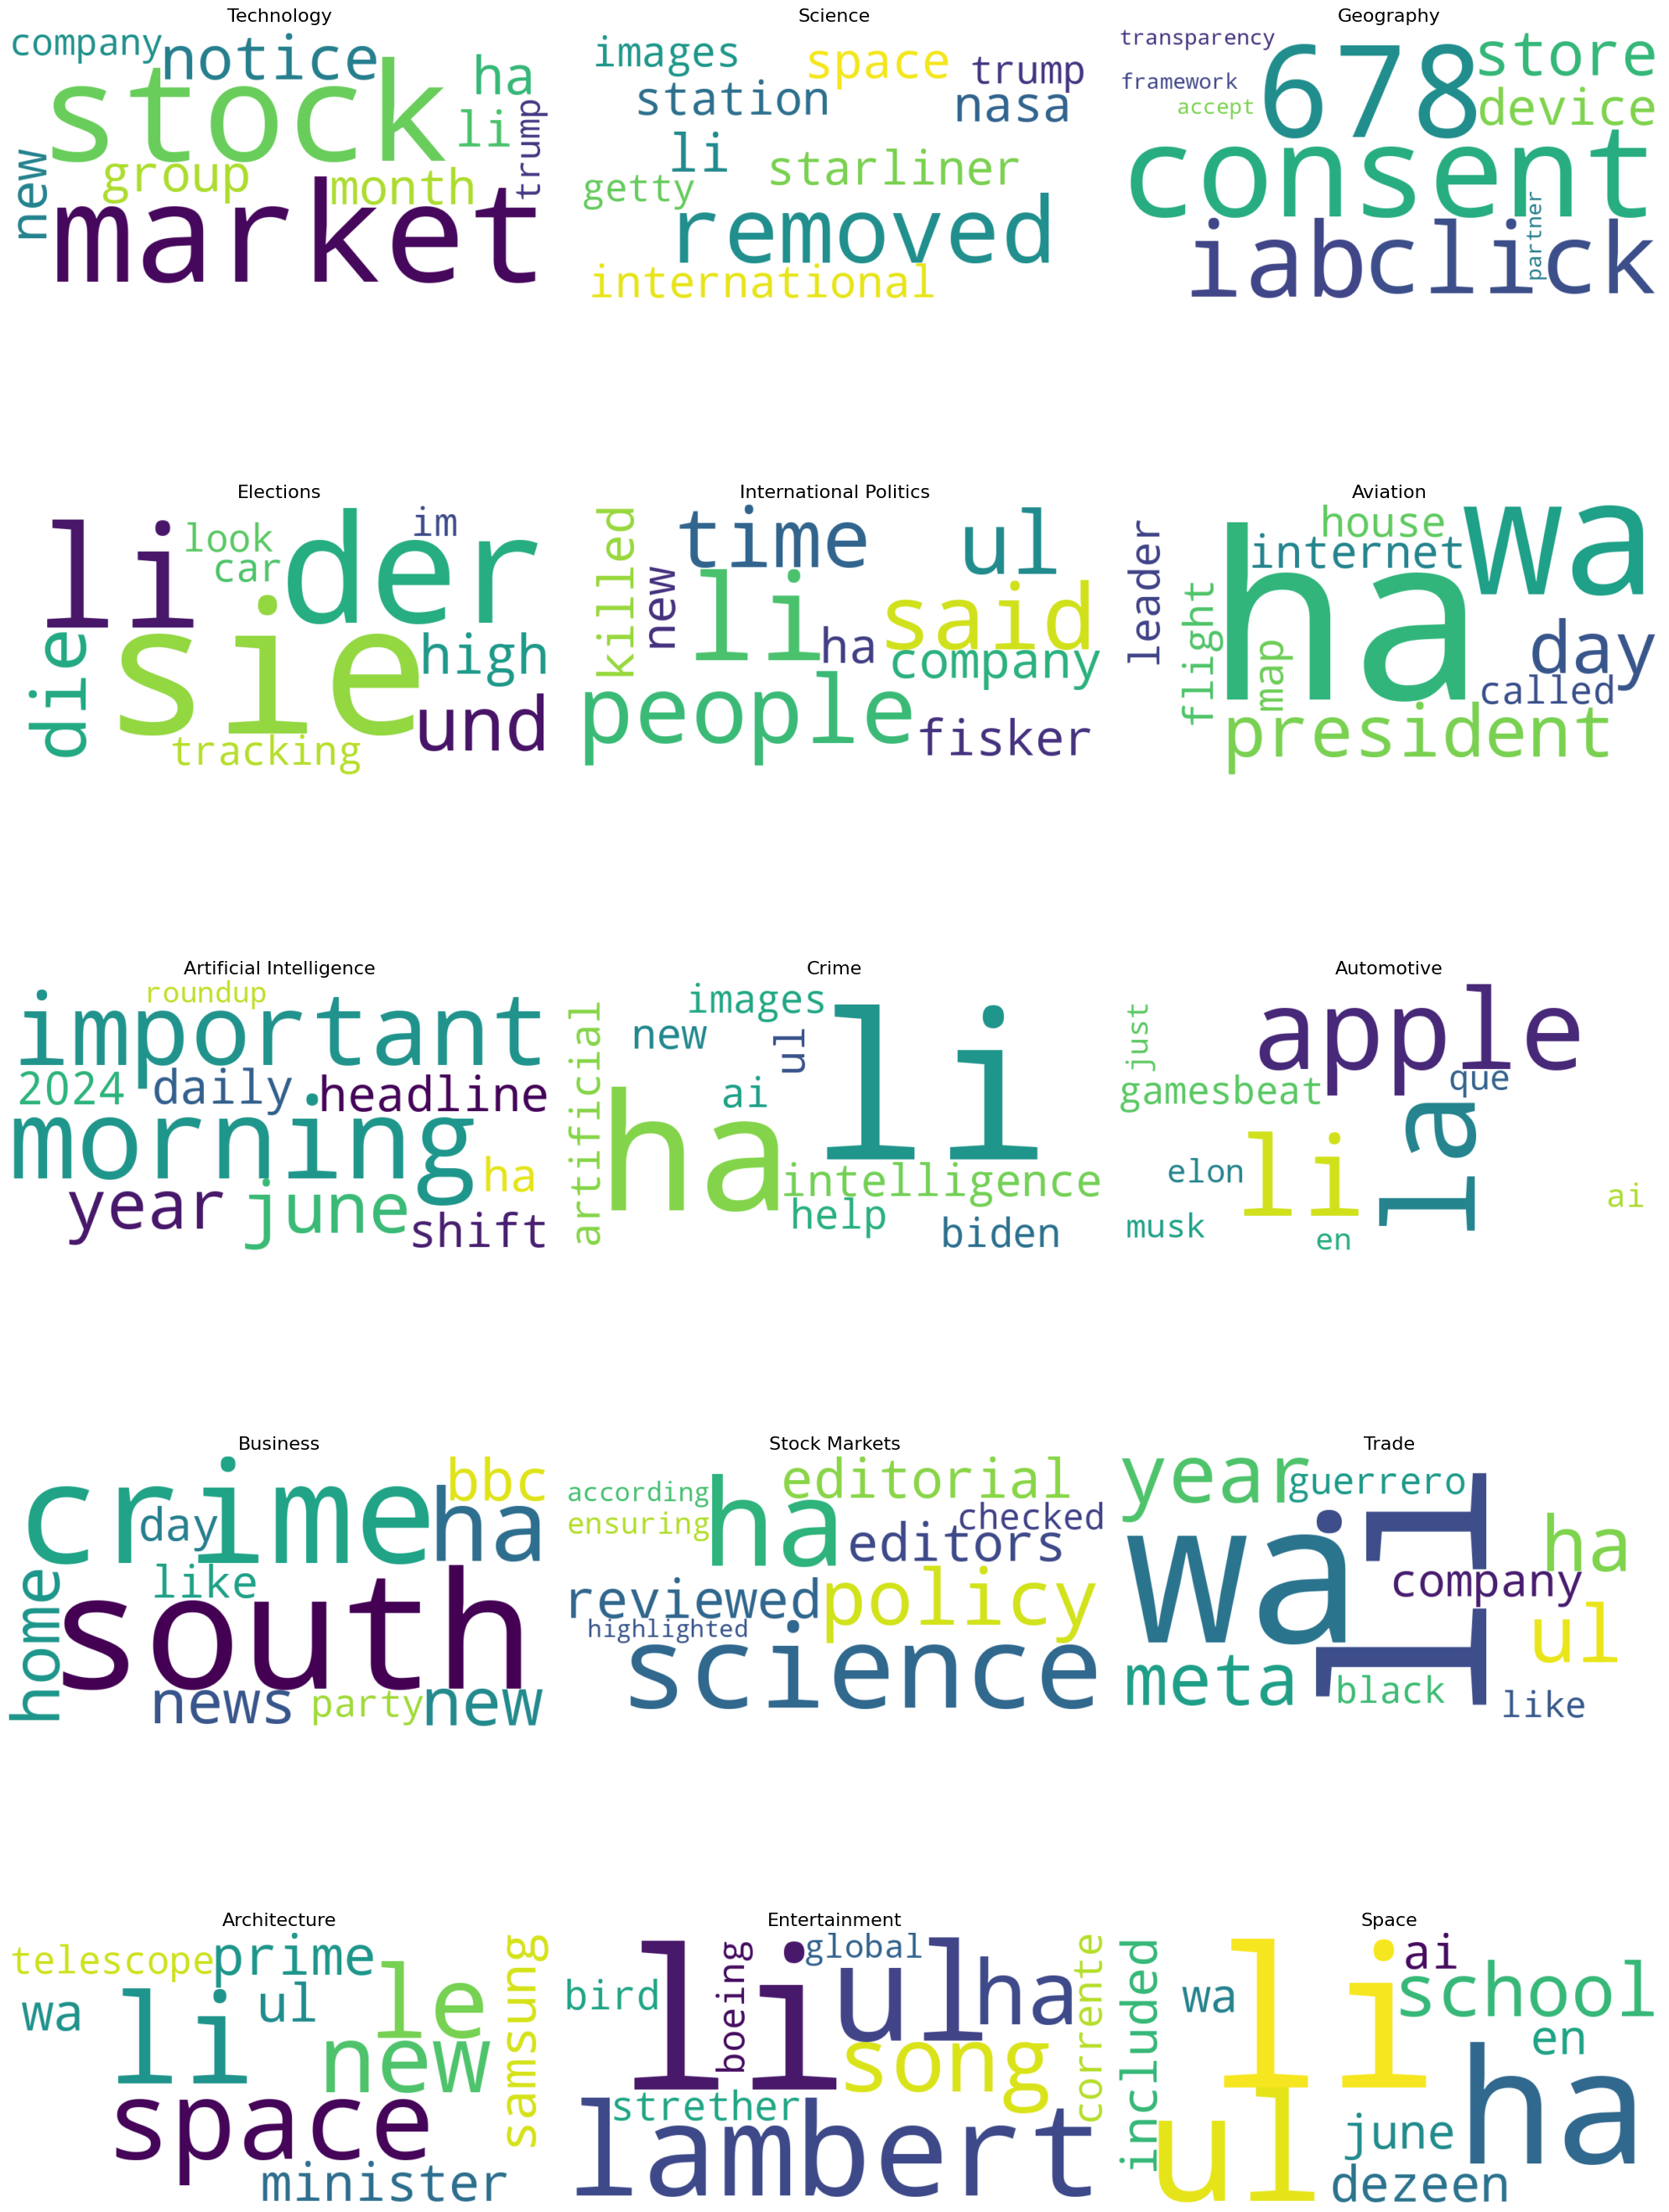

In [42]:
# Generate word clouds for each topic
def plot_wordclouds(lda, vectorizer, topic_names, num_top_words):
    fig, axes = plt.subplots(5, 3, figsize=(20, 30))
    axes = axes.flatten()

    for topic_idx, (topic, words) in enumerate(topics.items()):
        word_freq = {word: lda.components_[topic_idx][vectorizer.vocabulary_[word]] for word in words}
        wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(word_freq)
        ax = axes[topic_idx]
        ax.imshow(wordcloud, interpolation='bilinear')
        ax.set_title(topic, fontsize=16)
        ax.axis('off')

    # Turn off unused subplots
    for i in range(len(topics), len(axes)):
        axes[i].axis('off')

    plt.tight_layout()
    plt.show()

plot_wordclouds(lda, vectorizer, topic_names, num_top_words)

The above wordclouds are from the words which are across the topics.

The words with the biggest size are considered the most repetative and vice-versa. Which means, the size is directly propotional to the frequency.

                                   clean_content_str
0  seems evident almost years first conference ar...
1  chatgpt developer openais approach building ar...
2                                            removed
3  sian eleri pictured investigates alleged ufo s...
4  extremists across us weaponized artificial int...


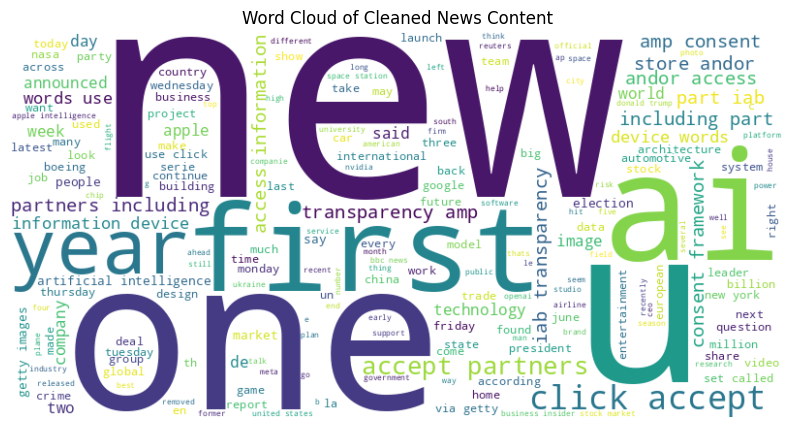

In [43]:
# Join tokens in each document to form a single string for each document
cleaned_news_df['clean_content_str'] = cleaned_news_df['clean_content'].apply(lambda x: ' '.join(x))

# Display the cleaned data with joined strings
print(cleaned_news_df[['clean_content_str']].head())

# Join all cleaned text into a single string
all_cleaned_text = ' '.join(cleaned_news_df['clean_content_str'])

# Generate a word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_cleaned_text)

# Plot the word cloud
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Cleaned News Content')
plt.show()


This block defines the create_wordcloud function, which generates word clouds for each topic in the LDA model. It uses the wordcloud and matplotlib libraries to create and display the word cloud which is unified across the Topics.

# VI. Retrival of the News.

In [44]:
words_and_frequencies = wordcloud.words_

#printing those words and frequencies
for word, frequency in words_and_frequencies.items():
    print(f"{word}: {frequency}")

new: 1.0
u: 0.4926829268292683
one: 0.4585365853658537
ai: 0.3902439024390244
first: 0.36585365853658536
year: 0.36585365853658536
click accept: 0.35121951219512193
accept partners: 0.35121951219512193
partners including: 0.35121951219512193
including part: 0.35121951219512193
part iab: 0.35121951219512193
iab transparency: 0.35121951219512193
transparency amp: 0.35121951219512193
amp consent: 0.35121951219512193
consent framework: 0.35121951219512193
store andor: 0.35121951219512193
andor access: 0.35121951219512193
access information: 0.35121951219512193
information device: 0.35121951219512193
device words: 0.35121951219512193
words use: 0.35121951219512193
two: 0.2926829268292683
said: 0.28780487804878047
apple: 0.28292682926829266
company: 0.2780487804878049
week: 0.2731707317073171
image: 0.2731707317073171
de: 0.2682926829268293
world: 0.25853658536585367
day: 0.25853658536585367
announced: 0.24878048780487805
technology: 0.24390243902439024
artificial intelligence: 0.24390243902

**Word Frequencies**
The words and their frequencies are extracted from the word cloud using the words_ attribute.
These words and frequencies are then printed in a readable format.
This code will generate and display a word cloud for each topic and print the words and their frequencies, making it easier to understand the significant terms associated with each topic.

In [45]:
# Access words (extract keys from the words_ dictionary)
words_in_cloud = list(wordcloud.words_.keys())

# Print the extracted words
print(words)

# Print and save words to a text file
with open('word_cloud_words.txt', 'w') as f:
    for word in words_in_cloud:
        f.write(word + '\n')

print(f"Word cloud words saved to 'word_cloud_words.txt'")

['wa', 'june', 'en', 'ai', 'included', 'dezeen', 'school', 'ul', 'ha', 'li']
Word cloud words saved to 'word_cloud_words.txt'


This block defines the interactive_wordcloud function, which generates an interactive word cloud using the plotly library. It creates a scatter plot where each word is a point, and clicking on the word displays related articles. The word cloud is saved as an HTML file and opened in a web browser.

In [46]:
# Read words from text file
word_cloud_words = []
with open('word_cloud_words.txt', 'r') as f:
    word_cloud_words = [line.strip() for line in f.readlines()]

# Prepare word data for DataTable
word_data = [{'Word': word} for word in word_cloud_words]


This code snippet saves the words from the word cloud and it saves in the text file. With t ehelp of this in the following code snippets, the retrival of the news is done.

This script sets up a Dash application to display and interact with news articles stored in a CSV file. It starts by loading the data using pandas. The app layout includes a title and a data table where users can select words. When a word is selected, a callback function retrieves and displays related articles from the dataset, showing each article's title, URL, and a summary. This allows users to explore content related to specific keywords interactively. The app is run in debug mode for development purposes. The word data displayed in the table should be replaced with actual data for meaningful interaction.

In [47]:
# Load CSV data (replace with your actual CSV file path and column name)
df = pd.read_csv('/content/data/news_articles.csv')

# Create Dash app
app = Dash(__name__)

app.layout = html.Div([
    html.H1("Words from Text File"),
    dash_table.DataTable(
        id='word-table',
        columns=[{'name': 'Word', 'id': 'Word'}],
        data=word_data,
        row_selectable='single',
        selected_rows=[],
        style_cell={'textAlign': 'left', 'whiteSpace': 'normal', 'height': 'auto'},
    ),
    html.Div(id='article-display')
])

@app.callback(
    Output('article-display', 'children'),
    Input('word-table', 'selected_rows')
)
def display_related_articles(selected_rows):
    if not selected_rows:
        return "Click on a word in the table to see related articles."

    word = word_data[selected_rows[0]]['Word']
    # Filter rows where 'content' column contains the selected word
    related_articles = df[df['content'].str.contains(word, na=False)]

    if related_articles.empty:
        return f"No articles found for the word '{word}'."

    articles_html = []
    for title, url, content in zip(related_articles['title'], related_articles['url'], related_articles['content']):
        article_summary = f"<b>{title}</b>: <a href='{url}' target='_blank'>{url}</a><br>{content[:300]}..." if len(content) > 300 else f"<b>{title}</b>: <a href='{url}' target='_blank'>{url}</a><br>{content}"
        articles_html.append(html.Div([html.P(article_summary), html.Hr()]))

    return html.Div([
        html.H2(f"Articles related to '{word}':"),
        *articles_html
    ])

if __name__ == '__main__':
    app.run_server(debug=True)


<IPython.core.display.Javascript object>